In [1]:
import numpy as np
import os
import networkx as nx
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from numpy import dot
from numpy.linalg import norm


from collections import Counter
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd './drive/MyDrive/232EProject1'

/content/drive/MyDrive/232EProject1


#### Loading CORA dataset from files

In [6]:
all_data = []
all_edges = []

for root,dirs,files in os.walk('./cora'):
    for file in files:
        if '.content' in file:
            with open(os.path.join(root,file),'r') as f:
                all_data.extend(f.read().splitlines())
        elif 'cites' in file:
            with open(os.path.join(root,file),'r') as f:
                all_edges.extend(f.read().splitlines())

                
#random_state = 42
#all_data = shuffle(all_data,random_state=random_state)

#### Label Encoding

In [8]:
categories =  ['Reinforcement_Learning', 'Theory', 'Case_Based', 'Genetic_Algorithms', 'Probabilistic_Methods', 'Neural_Networks', 'Rule_Learning']
sorted(categories)
label_encoder = {}
i = 0
for cat in sorted(categories):
  label_encoder[cat] = i
  i +=1
label_encoder


{'Case_Based': 0,
 'Genetic_Algorithms': 1,
 'Neural_Networks': 2,
 'Probabilistic_Methods': 3,
 'Reinforcement_Learning': 4,
 'Rule_Learning': 5,
 'Theory': 6}

#### Creating Graph using edge list and taking GCC component

In [9]:
#parse the data
labels = []
nodes = []
X = []
element_to_ind  = {}

for i,data in enumerate(all_data):
    elements = data.split('\t')
    labels.append(label_encoder[elements[-1]])
    X.append(elements[1:-1])
    nodes.append(elements[0])
    element_to_ind[elements[0]]= i
X = np.array(X,dtype=int)
N = X.shape[0] #the number of nodes
F = X.shape[1] #the size of node features
print('X shape: ', X.shape)


#parse the edge
edge_list=[]
for edge in all_edges:
    e = edge.split('\t')
    edge_list.append((e[0],e[1]))

print('\nNumber of nodes (N): ', N)
print('\nNumber of features (F) of each node: ', F)
print('\nCategories: ', set(labels))

num_classes = len(set(labels))
print('\nNumber of classes: ', num_classes)


X shape:  (2708, 1433)

Number of nodes (N):  2708

Number of features (F) of each node:  1433

Categories:  {0, 1, 2, 3, 4, 5, 6}

Number of classes:  7


In [10]:
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edge_list)
G = nx.relabel_nodes(G, element_to_ind)
print('Graph info: ', nx.info(G))

Graph info:  Graph with 2708 nodes and 5278 edges


In [11]:
nodes = list(G.nodes)
print(len(nodes))
list(G.neighbors(0))

2708


[258, 544, 8, 435, 14]

In [12]:
df = pd.DataFrame(list(zip(nodes, labels,X)),columns =['node', 'label','features'])
print(len(df))
df.head()

2708


,node,label,features
0,0,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
2,2,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,3,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [13]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
gcc_nodes = list(G.nodes)

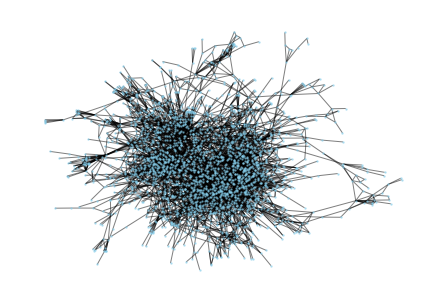

In [16]:
nx.draw(G, with_labels = False, node_size=2, alpha=0.5, node_color="skyblue")

In [ ]:
df = df.loc[df['node'].isin(gcc_nodes)]
df['node'] = list(range(len(df))) #rename nodes 
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,node,label,features
0,0,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
2,2,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,3,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
train = df.groupby('label', group_keys=False).apply(lambda x: x.sample(20))
G = nx.relabel_nodes(G, df['node'])

In [ ]:
train.sample(5)

,node,label,features
1193,1125,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
822,774,6,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
773,727,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2091,1949,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1614,1521,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


#### Random Walks with Simple transition matrix

In [ ]:
def create_transition_matrix(g):
    vs = list(g.nodes)
    n = len(vs)
    adj = nx.adjacency_matrix(g)
    transition_matrix = adj/adj.sum(axis=1)

    return transition_matrix

In [ ]:
seeds_dict = {predicted:list(train[train['label'] == predicted]['node']) for predicted in range(7)}

In [ ]:
def random_walk(g, num_steps, start_node, transition_matrix, alpha):
  vcount = len(nx.nodes(g))
  st_node_label = np.array(train[train['node'] == start_node]['label'])[0]
  possibleNodes = seeds_dict[st_node_label]

  if len(transition_matrix) == 0:
    transition_matrix = create_transition_matrix(g)
  
  v = start_node
  v_probs = np.repeat(1.0/20.0, len(possibleNodes))

  for i in range(num_steps):
    if np.random.uniform(0, 1) < alpha:
        v = np.random.choice(possibleNodes, 1, True, v_probs)[0]
    else:
      PMF = np.array(transition_matrix[v])
      v = np.random.choice(np.arange(0, vcount), 1, True, PMF)[0]

  return v

In [ ]:
#pagerank. NO teleportation, NO tfidf. 
transition_matrix = create_transition_matrix(G)

num_samples = 1000
num_walk_steps = 100

visiting_freq_label = []
for i in range(transition_matrix.shape[0]):
  visiting_freq_label.append([0,0,0,0,0,0,0])

visiting_freq = [0 for i in range(transition_matrix.shape[0])]

count = 1
for train_node,predicted in zip(train['node'],train['label']):
  #print (train_node,predicted)
  for i in range(num_samples):
    start_point = train_node
    end_node = random_walk(G, num_walk_steps, start_point, transition_matrix, 0)
    visiting_freq_label[end_node][predicted]+= 1
    visiting_freq[end_node]+=1
  print(count)
  count+=1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140


In [ ]:
count = 0 #these many nodes remain unvisited. 
for vf in visiting_freq:
  if vf ==0:
    count+=1
print('unvisited = ', count)
visiting_freq_label = np.asarray(visiting_freq_label)
preds = np.argmax(visiting_freq_label,axis = 1)
print(classification_report(df['label'], preds))
accuracy_score(df['label'], preds)

unvisited =  0
              precision    recall  f1-score   support

           0       0.32      0.49      0.39       285
           1       0.44      0.50      0.47       406
           2       0.56      0.31      0.40       726
           3       0.60      0.52      0.56       379
           4       0.14      0.20      0.17       214
           5       0.13      0.27      0.18       131
           6       0.29      0.24      0.26       344

    accuracy                           0.37      2485
   macro avg       0.35      0.36      0.34      2485
weighted avg       0.42      0.37      0.38      2485



0.3722334004024145

In [ ]:
#pagerank. teleportation = 0.1, NO tfidf. 
transition_matrix = create_transition_matrix(G)

num_samples = 1000
num_walk_steps = 100

visiting_freq_label = []
for i in range(transition_matrix.shape[0]):
  visiting_freq_label.append([0,0,0,0,0,0,0])

visiting_freq = [0 for i in range(transition_matrix.shape[0])]

count = 1
for train_node,predicted in zip(train['node'],train['label']):
  #print (train_node,predicted)
  for i in range(num_samples):
    start_point = train_node
    end_node = random_walk(G, num_walk_steps, start_point, transition_matrix, 0.1)
    visiting_freq_label[end_node][predicted]+= 1
    visiting_freq[end_node]+=1

  if count % 20 == 0:
    print(count)
  count+=1

20
40
60
80
100
120
140


In [ ]:
count = 0 #these many nodes remain unvisited. 
for vf in visiting_freq:
  if vf ==0:
    count+=1
print('unvisited = ', count)
visiting_freq_label = np.asarray(visiting_freq_label)
preds = np.argmax(visiting_freq_label,axis = 1)
print(classification_report(df['label'], preds))
accuracy_score(df['label'], preds)

unvisited =  34
              precision    recall  f1-score   support

           0       0.69      0.72      0.70       285
           1       0.82      0.92      0.87       406
           2       0.87      0.61      0.72       726
           3       0.84      0.78      0.81       379
           4       0.66      0.79      0.72       214
           5       0.48      0.87      0.62       131
           6       0.61      0.67      0.64       344

    accuracy                           0.74      2485
   macro avg       0.71      0.77      0.72      2485
weighted avg       0.76      0.74      0.74      2485



0.7364185110663984

In [ ]:
#pagerank. teleportation = 0.2, NO tfidf. 
transition_matrix = create_transition_matrix(G)

num_samples = 1000
num_walk_steps = 100

visiting_freq_label = []
for i in range(transition_matrix.shape[0]):
  visiting_freq_label.append([0,0,0,0,0,0,0])

visiting_freq = [0 for i in range(transition_matrix.shape[0])]

count = 1
for train_node,predicted in zip(train['node'],train['label']):
  #print (train_node,predicted)
  for i in range(num_samples):
    start_point = train_node
    end_node = random_walk(G, num_walk_steps, start_point, transition_matrix, 0.2)
    visiting_freq_label[end_node][predicted]+= 1
    visiting_freq[end_node]+=1

  if count % 20 == 0:
    print(count)
  count+=1

20
40
60
80
100
120
140


In [ ]:
count = 0 #these many nodes remain unvisited. 
for vf in visiting_freq:
  if vf ==0:
    count+=1
print('unvisited = ', count)
visiting_freq_label = np.asarray(visiting_freq_label)
preds = np.argmax(visiting_freq_label,axis = 1)
print(classification_report(df['label'], preds))
accuracy_score(df['label'], preds)

unvisited =  77
              precision    recall  f1-score   support

           0       0.56      0.74      0.64       285
           1       0.83      0.89      0.86       406
           2       0.87      0.56      0.68       726
           3       0.83      0.73      0.78       379
           4       0.60      0.76      0.67       214
           5       0.51      0.86      0.64       131
           6       0.61      0.68      0.64       344

    accuracy                           0.71      2485
   macro avg       0.69      0.75      0.70      2485
weighted avg       0.74      0.71      0.71      2485



0.7114688128772636

#### Random walks with cosine similarity based transition matrix

In [ ]:
## Transition matrix as per cosine similarity of text features of each node

vs = list(G.nodes)
n = len(vs)
adj = nx.adjacency_matrix(G)
transition = np.zeros((len(G.nodes), len(G.nodes)))


In [ ]:
for i, n1 in enumerate(vs):
  for j, n2 in enumerate(vs):
    if adj[n1, n2] > 0:
      feat_n1 = np.array(df[df['node'] == n1]['features'])[0]
      feat_n2 = np.array(df[df['node'] == n2]['features'])[0]

      cos_sim = np.inner(feat_n1, feat_n2)/(np.linalg.norm(feat_n1) * np.linalg.norm(feat_n1))
      transition[n1,n2] = np.exp(cos_sim)
  total = np.sum(transition[i, :])
  transition[i, :] = transition[i, :] / (total * 1.0)

In [ ]:
#pagerank. Without teleportation. WITH TFIDF 
transition_matrix = transition

num_samples = 1000
num_walk_steps = 100

visiting_freq_label = []
for i in range(transition_matrix.shape[0]):
  visiting_freq_label.append([0,0,0,0,0,0,0])

visiting_freq = [0 for i in range(transition_matrix.shape[0])]

count = 1
for train_node,predicted in zip(train['node'],train['label']):
  #print (train_node,predicted)
  for i in range(num_samples):
    start_point = train_node
    end_node = random_walk(G, num_walk_steps, start_point, transition_matrix, 0)
    visiting_freq_label[end_node][predicted]+= 1
    visiting_freq[end_node]+=1

  if count % 20 == 0:
    print(count)
  count+=1


20
40
60
80
100
120
140


In [ ]:
count = 0 #these many nodes remain unvisited. 
for vf in visiting_freq:
  if vf ==0:
    count+=1
print('unvisited = ', count)
visiting_freq_label = np.asarray(visiting_freq_label)
preds = np.argmax(visiting_freq_label,axis = 1)
print(classification_report(df['label'], preds))
accuracy_score(df['label'], preds)

unvisited =  0
              precision    recall  f1-score   support

           0       0.37      0.58      0.45       285
           1       0.48      0.53      0.50       406
           2       0.54      0.31      0.39       726
           3       0.63      0.56      0.59       379
           4       0.09      0.11      0.10       214
           5       0.10      0.23      0.14       131
           6       0.27      0.21      0.23       344

    accuracy                           0.38      2485
   macro avg       0.35      0.36      0.34      2485
weighted avg       0.42      0.38      0.39      2485



0.37746478873239436

In [ ]:
#pagerank. WITH teleportation = 0.1 WITH TFIDF

transition_matrix = transition

num_samples = 1000
num_walk_steps = 100

visiting_freq_label = []
for i in range(transition_matrix.shape[0]):
  visiting_freq_label.append([0,0,0,0,0,0,0])

visiting_freq = [0 for i in range(transition_matrix.shape[0])]

count = 1
for train_node,predicted in zip(train['node'],train['label']):
  #print (train_node,predicted)
  for i in range(num_samples):
    start_point = train_node
    end_node = random_walk(G, num_walk_steps, start_point, transition_matrix, 0.1)
    visiting_freq_label[end_node][predicted]+= 1
    visiting_freq[end_node]+=1

  if count % 20 == 0:
    print(count)
  count+=1


20
40
60
80
100
120
140


In [ ]:
count = 0 #these many nodes remain unvisited. 
for vf in visiting_freq:
  if vf ==0:
    count+=1
print('unvisited = ', count)
visiting_freq_label = np.asarray(visiting_freq_label)
preds = np.argmax(visiting_freq_label,axis = 1)
print(classification_report(df['label'], preds))
accuracy_score(df['label'], preds)

unvisited =  22
              precision    recall  f1-score   support

           0       0.67      0.75      0.70       285
           1       0.79      0.91      0.85       406
           2       0.81      0.61      0.70       726
           3       0.85      0.75      0.80       379
           4       0.63      0.84      0.72       214
           5       0.47      0.83      0.60       131
           6       0.65      0.57      0.61       344

    accuracy                           0.72      2485
   macro avg       0.70      0.75      0.71      2485
weighted avg       0.74      0.72      0.72      2485



0.7219315895372234

In [ ]:
2#pagerank. WITH teleportation = 0.2 WITH TFIDF
transition_matrix = transition

transition_matrix = transition

num_samples = 1000
num_walk_steps = 100

visiting_freq_label = []
for i in range(transition_matrix.shape[0]):
  visiting_freq_label.append([0,0,0,0,0,0,0])

visiting_freq = [0 for i in range(transition_matrix.shape[0])]

count = 1
for train_node,predicted in zip(train['node'],train['label']):
  #print (train_node,predicted)
  for i in range(num_samples):
    start_point = train_node
    end_node = random_walk(G, num_walk_steps, start_point, transition_matrix, 0.2)
    visiting_freq_label[end_node][predicted]+= 1
    visiting_freq[end_node]+=1

  if count % 20 == 0:
    print(count)
  count+=1


20
40
60
80
100
120
140


In [ ]:
count = 0 #these many nodes remain unvisited. 
for vf in visiting_freq:
  if vf ==0:
    count+=1
print('unvisited = ', count)
visiting_freq_label = np.asarray(visiting_freq_label)
preds = np.argmax(visiting_freq_label,axis = 1)
print(classification_report(df['label'], preds))
accuracy_score(df['label'], preds)

unvisited =  71
              precision    recall  f1-score   support

           0       0.57      0.74      0.64       285
           1       0.80      0.90      0.85       406
           2       0.81      0.58      0.67       726
           3       0.82      0.74      0.78       379
           4       0.64      0.86      0.73       214
           5       0.51      0.84      0.64       131
           6       0.66      0.56      0.60       344

    accuracy                           0.71      2485
   macro avg       0.69      0.74      0.70      2485
weighted avg       0.73      0.71      0.71      2485



0.7086519114688129